In [128]:
# Import the libraries we need to do linear algebra
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import copy

# Basic eigenvalue/eigenvector computation
Let's start with a simple example.

In [107]:
# Create a starting 2x2 matrix of all ones.
base_matrix = np.ones((2,2))
print(type(base_matrix))
print(base_matrix.shape)
print(base_matrix)

<class 'numpy.ndarray'>
(2, 2)
[[1. 1.]
 [1. 1.]]


In [108]:
# np.linalg.eig is the workhorse function to compute eigenvalues and eigenvectors. Let's look at its help text.
?np.linalg.eig

In [109]:
# Compute eigenvalues of the base matrix.
# We use this trick in Python where the function np.linalg.eig returns a list of two things (see previous cell) and
# we're allowed to put two variable names on the left hand sign to assign to each of them.
eigenvalues, eigenvectors = np.linalg.eig(base_matrix)
print(type(eigenvalues)) # Use type and shape to understand what we got back from the function.
print(eigenvalues.shape)
print(eigenvalues)

print(type(eigenvectors))
print(eigenvectors.shape)
print(eigenvectors)

<class 'numpy.ndarray'>
(2,)
[2. 0.]
<class 'numpy.ndarray'>
(2, 2)
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [110]:
for i in range(len(eigenvalues)):
# Advanced: see also the enumerate() function to use in place of range(len())
    print('------')
    print(eigenvalues[i])
    print(eigenvectors[:, i])
    print(np.matmul(base_matrix, eigenvectors[:, i]))
    # Check that multiplying the matrix with an eigenvector is equal to multiplying the eigenvector by its eigenvalue.
    # Advanced: See also the np.isclose() function (instead of ==) for comparing two floats
    print(np.matmul(base_matrix, eigenvectors[:, i]) == eigenvalues[i]*eigenvectors[:, i])

------
2.0
[0.70710678 0.70710678]
[1.41421356 1.41421356]
[ True  True]
------
0.0
[-0.70710678  0.70710678]
[0. 0.]
[ True  True]


# Tracing the path of eigenvalues
Let's try perturbing (aka changing) the matrix a little bit at a time and track how the eigenvalues and eigenvectors change when we do that.

In [54]:
def increment_matrix(matrix: np.array, posn=(0,0), incr=0.01):
    """
    Increment the value of one position in a matrix by a given amount.
    Requires the argument matrix to have type np.array
    """
    # We need to use copy.copy to create a new array. "new_matrix = matrix" would just point to the original array.
    new_matrix = copy.copy(matrix) 
    # If we had not used copy.copy above then the next line would also change the value of matrix, which we do not want
    new_matrix[posn] += incr
    return new_matrix

In [74]:
# As an aside, here's an example of what can happen if we don't use copy.copy. (Bad!)
# This is just a glitch of how Python was designed.
# (There are reasons they made it that way but not worth getting into)
test_matrix = np.ones((2,2))
second_test_matrix = test_matrix # no copy.copy
print('orig value of test_matrix')
print(test_matrix)
print('orig value of second_test_matrix')
print(second_test_matrix)

# We only want to change second_test_matrix
second_test_matrix += 555555

print('final value of test_matrix - not what we want')
print(test_matrix)
print('final value of second_test_matrix')
print(second_test_matrix)

orig value of test_matrix
[[1. 1.]
 [1. 1.]]
orig value of second_test_matrix
[[1. 1.]
 [1. 1.]]
final value of test_matrix - not what we want
[[555556. 555556.]
 [555556. 555556.]]
final value of second_test_matrix
[[555556. 555556.]
 [555556. 555556.]]


In [73]:
# Here's an example of what happens when we use copy.copy. (Good!)
test_matrix = np.ones((2,2))
second_test_matrix = copy.copy(test_matrix)
print('orig value of test_matrix')
print(test_matrix)
print('orig value of second_test_matrix')
print(second_test_matrix)

second_test_matrix += 555555

print('final value of test_matrix - it isn\'t changed')
print(test_matrix)
print('final value of second_test_matrix')
print(second_test_matrix)

orig value of test_matrix
[[1. 1.]
 [1. 1.]]
orig value of second_test_matrix
[[1. 1.]
 [1. 1.]]
final value of test_matrix - it isn't changed
[[1. 1.]
 [1. 1.]]
final value of second_test_matrix
[[555556. 555556.]
 [555556. 555556.]]


In [117]:
def increment_eigenvalues(base_matrix, increment):
    """
    Add the amount increment to the top left element of base_matrix and return the eigenvalues/eigenvectors
    """
    new_matrix = increment_matrix(base_matrix, incr=increment)
    return np.linalg.eig(new_matrix)

In [122]:
increments = np.arange(0, 0.5, 0.01)
print(increments)
# Use a list comprehension ("[...for...in...]") to get the eigenvalues for several matrices
# that are perturbations of base_matrix. We gradually increase the upper left element.
eigen_path = [increment_eigenvalues(base_matrix, increment) for increment in increments]

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49]


In [127]:
print(len(eigen_path))
# first element (base_matrix)
print(increments[0])
print(eigen_path[0])
# second element (base_matrix + smallest increment)
print(increments[1])
print(eigen_path[1])
# last element (base_matrix + largest increment)
print(increments[-1])
print(eigen_path[-1])

50
0.0
(array([2., 0.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
0.01
(array([2.0050125, 0.0049875]), array([[ 0.70887232, -0.70533682],
       [ 0.70533682,  0.70887232]]))
0.49
(array([2.27457516, 0.21542484]), array([[ 0.78675353, -0.61726727],
       [ 0.61726727,  0.78675353]]))


In [139]:
# This next part is basically just Python bookkeeping. We want to make a table showing how the eigenvalues change as
# we increment the matrix. eigen_path isn't in table form- it's kind of a hassle to get there, you just need to get used to the steps.
# eigen_path is a list. Each element if the list is a tuple (a special type of list). Inside each tuple are two
# numpy arrays, one for eigenvalues and one for eigenvectors.

print(type(eigen_path))
print(len(eigen_path))
print(eigen_path[0])
print(type(eigen_path[0]))
print(len(eigen_path[0]))
print(type(eigen_path[0][0]))
print(eigen_path[0][0])
print(type(eigen_path[0][1]))
print(eigen_path[0][1])

<class 'list'>
50
(array([2., 0.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
<class 'tuple'>
2
<class 'numpy.ndarray'>
[2. 0.]
<class 'numpy.ndarray'>
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [141]:
# Use another list comprehension to pull out all of the eigenvalues. (Two for each matrix we incremented over)
eigenvalues = [x[0] for x in eigen_path]
# Now we're going to turn these into a "Pandas dataframe" which is an object that's basically a table.
eigen_path_dataframe = pd.DataFrame(eigenvalues, columns=['eigenvalue_1', 'eigenvalue_2'])
# Let's print out the first few rows:
eigen_path_dataframe.head()

,eigenvalue_1,eigenvalue_2
0,2.000000,0.000000
1,2.005012,0.004988
2,2.010050,0.009950
3,2.015112,0.014888
4,2.020200,0.019800


In [146]:
# Let's add a column with the increment values
eigen_path_dataframe['increment'] = increments
# Reorder the columns so increment is first
eigen_path_dataframe = eigen_path_dataframe[['increment', 'eigenvalue_1', 'eigenvalue_2']]
eigen_path_dataframe.head()

,increment,eigenvalue_1,eigenvalue_2
0,0.00,2.000000,0.000000
1,0.01,2.005012,0.004988
2,0.02,2.010050,0.009950
3,0.03,2.015112,0.014888
4,0.04,2.020200,0.019800


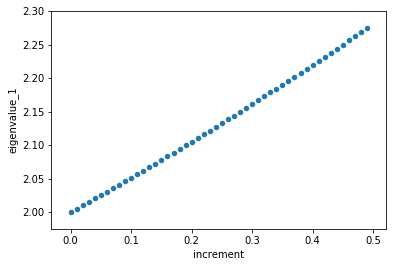

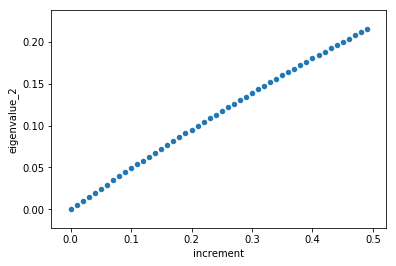

In [152]:
# Finally we can plot how the eigenvalues change as we increase the top left element of the matrix.
# They more or less follow a straight line, not that interesting.
eigen_path_dataframe.plot.scatter('increment', 'eigenvalue_1')
eigen_path_dataframe.plot.scatter('increment', 'eigenvalue_2')

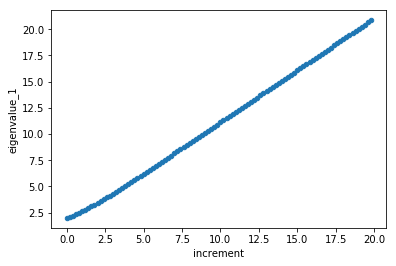

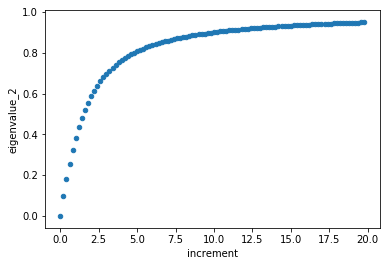

In [160]:
# Let's see what happens if we increase the top left element by a lot more.
# The first eigenvalue keeps increasing linearly but the second eigenvalue plateaus at 1!
increments2 = np.arange(0, 20, 0.2)
eigen_path2 = [increment_eigenvalues(base_matrix, increment) for increment in increments2]
eigenvalues2 = [x[0] for x in eigen_path2]
eigen_path_dataframe2 = pd.DataFrame(eigenvalues2, columns=['eigenvalue_1', 'eigenvalue_2'])
eigen_path_dataframe2['increment'] = increments2
eigen_path_dataframe2.plot.scatter('increment', 'eigenvalue_1')
eigen_path_dataframe2.plot.scatter('increment', 'eigenvalue_2')

In [173]:
eigenvalues2[1][::-1]

array([ 1.90498756, -0.10498756])

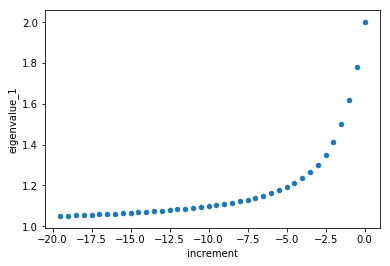

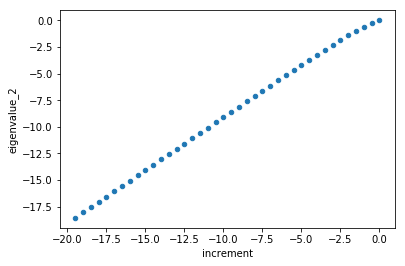

In [175]:
# What happens if we DECREASE the top left element by a lot more.
# Now the second eigenvalue keeps decreasing but the FIRST eigenvalue plateaus at 1!
increments2 = np.arange(0, -20, -0.5)
eigen_path2 = [increment_eigenvalues(base_matrix, increment) for increment in increments2]
eigenvalues2 = [x[0] for x in eigen_path2]

# Kind of a pain, we need to do this sorting trick to make sure eigenvalue_1 is always the larger of the two.
eigenvalues2 = [np.sort(x)[::-1] for x in eigenvalues2]

eigen_path_dataframe2 = pd.DataFrame(eigenvalues2, columns=['eigenvalue_1', 'eigenvalue_2'])
eigen_path_dataframe2['increment'] = increments2
eigen_path_dataframe2.plot.scatter('increment', 'eigenvalue_1')
eigen_path_dataframe2.plot.scatter('increment', 'eigenvalue_2')